In [1]:
import os
import pathlib

import sys
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install Keras --upgrade

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
#from tensorflow.keras import models
from IPython import display

seed = 42
#tf.random.set_seed(seed)
np.random.seed(seed)
#print(f'tf version = {tf.__version__}')

# Import the mini speech commands dataset

In [3]:
DATASET_PATH = 'data/mini_speech_commands'
data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
    tf.keras.utils.get_file('mini_speech_commands.zip',origin='http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip',
                            extract=True, cache_dir='.', cache_subdir = 'data')

# Load dataset

In [4]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
print('Commands:',commands)
commands = commands[(commands != 'README.md') & (commands != '.DS_Store')]
print('Commands:',commands)

train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(directory=data_dir, batch_size=64, validation_split=0.2, seed=0,
                                                               output_sequence_length =16000, subset = 'both')
label_names = np.array(train_ds.class_names)
print()
print('label names:', label_names)

train_ds.element_spec


Commands: ['down' 'go' 'left' 'no' 'README.md' 'right' 'stop' 'up' 'yes']
Commands: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']
Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.

label names: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [6]:
def squeeze(audio, labels):
    audio = tf.squeeze(audio, axis = -1)
    return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

test_ds = val_ds.shard(num_shards = 2, index = 0)
val_ds = val_ds.shard(num_shards = 2, index =1)

for example_audio, example_labels in train_ds.take(1):
    print(example_audio.shape)
    print(example_labels.shape)



(64, 16000)
(64,)


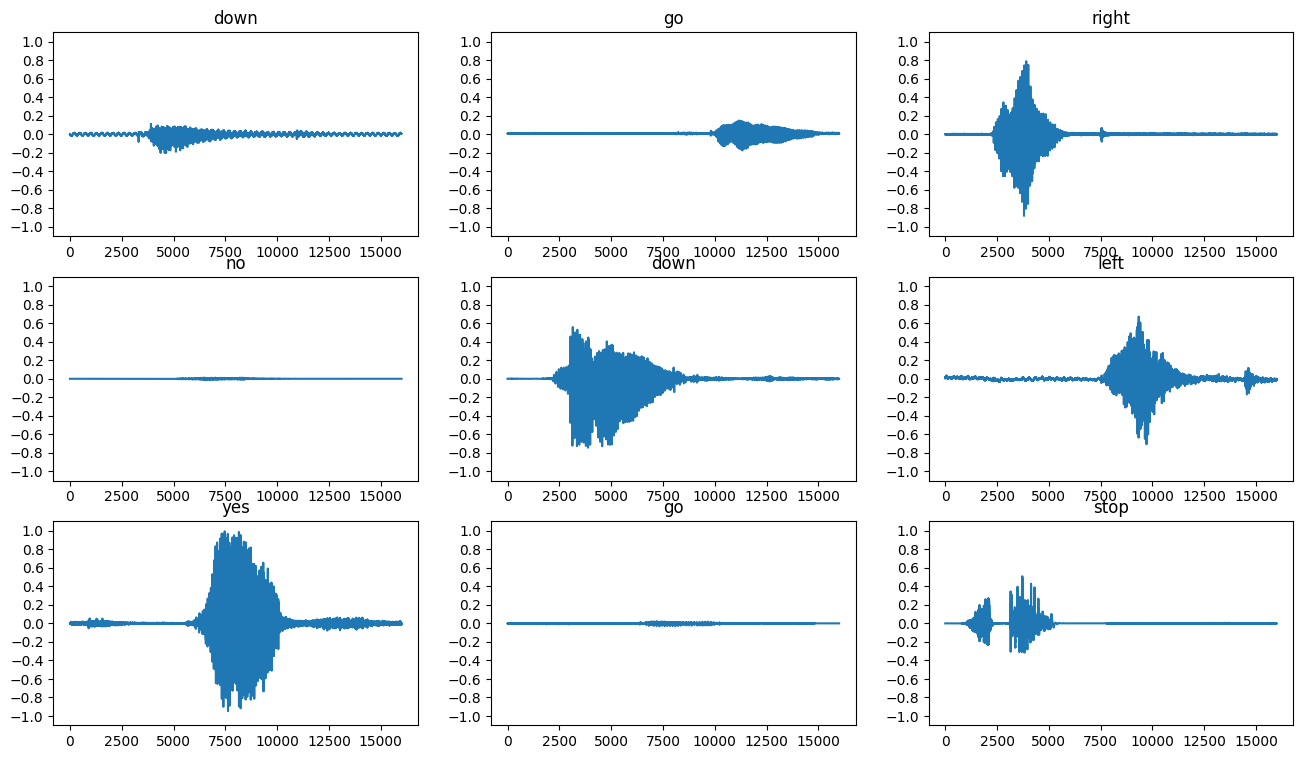

In [9]:
rows = 3 
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize = (16,9))

for i in range(n):
    if i >= n:
        break
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(example_audio[i].numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label_names[example_labels[i]]
    ax.set_title(label)
    ax.set_ylim([-1.1, 1.1])

plt.show()